<a href="https://colab.research.google.com/github/santumolcputhiyaparampil/ML/blob/main/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn import datasets

In [131]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
data = load_iris() 
data.feature_names #feature can be refere to as column but is a term that refer to independents var

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [133]:
data.target_names #and over here we have names of species or our target, the  dependent values.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [134]:
data.target # over here we see that by calling target on the dataset we get the number representations
            # or dummy representatives of the values in the dependent column

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [135]:
X = data.data #data basically refere to the values in the independent columns
X.shape      

(150, 4)

In [136]:
y = data.target  #  collecting the number represatation of the independent values
y.shape    

(150,)

In [137]:
y = y.reshape(-1, 1)
y.shape               # get it to 2D

(150, 1)

Text(0.5, 0, 'sepal length')

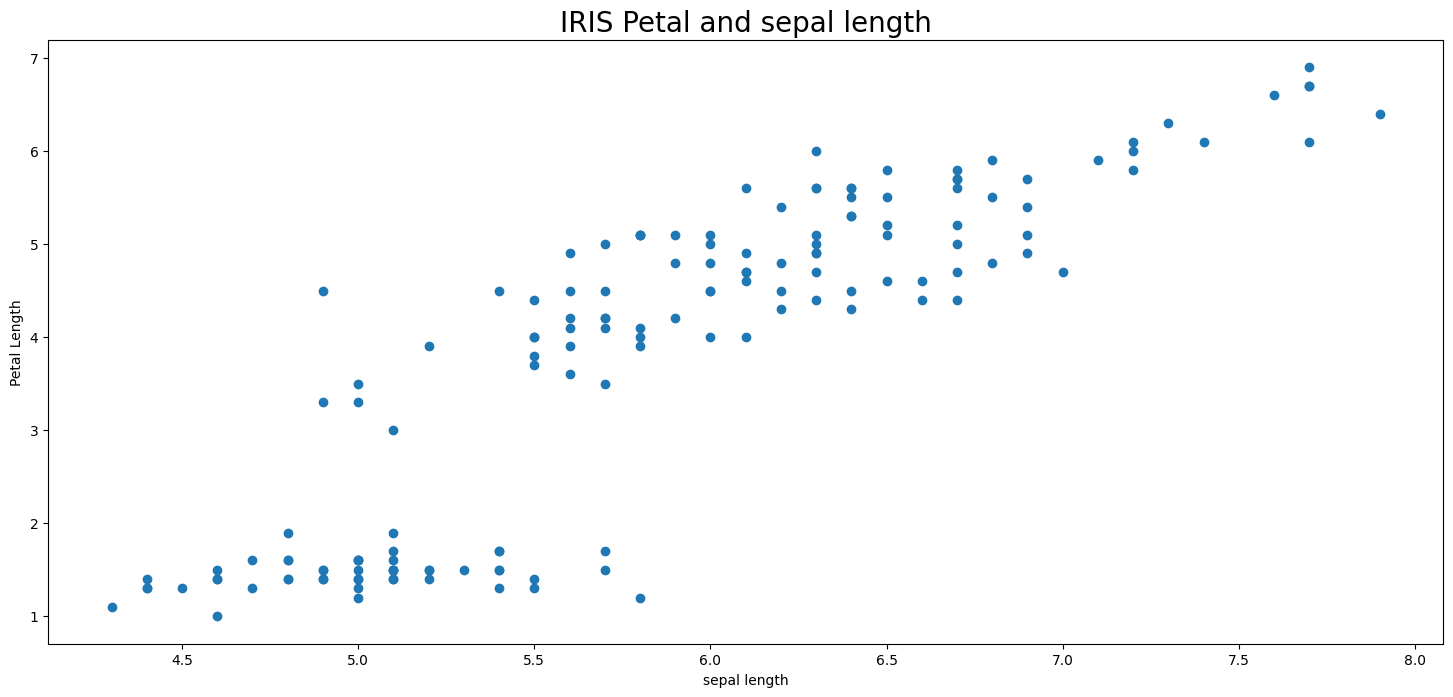

In [138]:
plt.figure(figsize=(18,8),dpi=100)   #set the canvas size for visibility

plt.scatter(X.T[0],X.T[2])   #over here I use the T ndarray method to transpose the data then get columns at index 0 and 2
plt.title('IRIS Petal and sepal length', fontsize=20) # set the title of the plot and adjust my font size for readability

#then we set the label (just to be obvious)
plt.ylabel('Petal Length') 
plt.xlabel('sepal length')

In [139]:
from sklearn.model_selection import train_test_split    #the tool for split the data 
from sklearn.linear_model import  LinearRegression      #and because we know we going to use linear regression for our prediction we import the class as well 


#over here we split the data. into the x&y trainer and y&x tester
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20) 

In [140]:
lr = LinearRegression()        #create our linear model

#fitting the model on the training data and try to predict the X_test
iris_model = lr.fit(X_train, y_train)
predictions = iris_model.predict(X_test)

<ipython-input-141-7660e5dcda31>:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(range(1, len(y_test)+1), y_test, yerr=(y_test-predictions), fmt='^k', ecolor='red')


<ErrorbarContainer object of 3 artists>

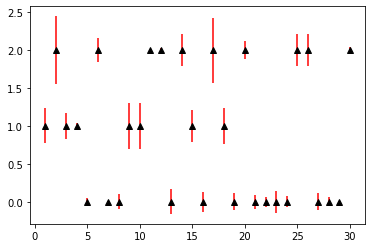

In [141]:
#plotting the error in our in our predicitions
plt.errorbar(range(1, len(y_test)+1), y_test, yerr=(y_test-predictions), fmt='^k', ecolor='red')


In [142]:
from sklearn.metrics import r2_score   #class will help us to calculate and see the score of our predictions

r2_score(y_test, predictions)

0.9532055727746666

In [143]:
#so over to get the RMSE we first get the distance between the y_test and the prediction then we elavated it to the power of **2 
#after we get the average number and finally use the numpy square root function.
np.sqrt(((predictions - y_test)**2).mean()) 

0.18816955988461306

In [144]:
x = data['data']
#separation of data into x and y
y = x[:,0]
x = x[:,1:4]


In [145]:
from sklearn.model_selection import train_test_split #splitting the dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)
from sklearn.linear_model import LinearRegression #model creation
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [146]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print("R2Score",r2score*100)

R2Score 72.60811953040603


In [147]:
import numpy as np #prediction
x = x_test
x_T = x.transpose()
x_T_x = x_T.dot(x)
x_T_x_inv = np.linalg.inv(x_T_x)
beta = x_T_x_inv.dot(x_T).dot(y_test)
print(beta)
beta_x = beta.dot(x_T)
print(beta_x)

[ 1.11833096  0.87349176 -0.81477536]
[5.63067381 5.1395198  5.75692343 7.27956223 4.94960784 6.89450434
 4.80526505 6.35007422 6.18340164 5.56608577 6.65852885 6.28720896
 6.25900753 5.92722575 6.20788556 5.16740239 5.95170967 5.77329381
 4.33344874 5.1711199  5.7818856  6.06354277 5.29900454 4.30309318
 5.85749149 4.73652815 5.58338186 5.93996639 4.63990866 4.87400194
 6.80443502 6.06354277 5.06144094 6.16850686 6.23037476 5.28542596
 5.49016104 6.170661  ]


In [148]:
from sklearn.metrics import r2_score
r2score1 = r2_score(y_test,beta_x)
print("R2Score",r2score1*100)

R2Score 70.99401512456087


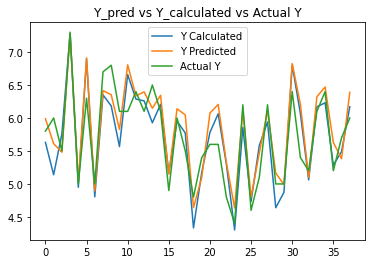

In [149]:
plt.plot(np.arange(len(beta_x)),beta_x)
plt.plot(np.arange(len(x_test)),y_pred)
plt.plot(np.arange(len(x_test)),y_test)
plt.legend(['Y Calculated', 'Y Predicted','Actual Y'])
plt.title('Y_pred vs Y_calculated vs Actual Y')
plt.show()